# Лекция 11: Dask

__Автор: Сергей Вячеславович Макрушин__ e-mail: SVMakrushin@fa.ru 

Финансовый универсиет, 2021 г. 

При подготовке лекции использованы материалы:
* ...

V 0.2 07.11.2021

## Разделы: <a class="anchor" id="разделы"></a> 
-

* [к оглавлению](#разделы)

In [11]:
# загружаем стиль для оформления презентации
from IPython.display import HTML
from urllib.request import urlopen
html = urlopen("file:./lec_v2.css")
HTML(html.read().decode('utf-8'))

__Python для численных расчетов__

__Преимущества:__
* <em class="pl"></em> __Быстрый__ – за счет использования Python как «glue language» и реализации алгоритмов на C/C++/Fortran 
* <em class="pl"></em> __Удобный и привычный интерфейс__ – использование Python и длительная история использования ключевых библиотек
* <em class="pl"></em> __Общепринятый – хорошее сообщество__, множество пакетов для различных задач, проверенный, понятный и распространенный

__Недостатки:__
* <em class="mn"></em> __GIL и его последствия__ – обычно пакеты рассчитаны на использование в однопоточном режиме
* <em class="mn"></em> __Ограничение по памяти__ – стандартные сценарии использования пакетов ограничыены объемом оперативной памяти

<center>         
    <img src="./img/python_st.png" alt="Стек технологий Python для обработки данных и научных расчетов" style="width: 700px;"/>
    <b>Стек технологий Python для обработки данных и научных расчетов</b>
</center>

__Знакомство с Dask__

<center>         
    <img src="./img/dask.png" alt="Dask" style="width: 200px;"/>
</center>

<center>         
    <img src="./img/dask_tasks.png" alt="Пример организации вычислений с помощью Dask" style="width: 600px;"/>
    <b>Пример организации вычислений с помощью Dask</b>
</center>

Dask это:
* Фрэймворк для __параллельных вычислений__, усиливающий возможности экосистемы Python
* Dask позволяет работать с наборами данных, __большими, чем объем оперативной памяти__
* Dask использует алгоритмы __обрабатывающие данные поблочно__ и __планировку задач__
* Dask написан __на чистом Python__

Dask предоставляет:
* Гибкую парадигму параллельных вычислений
* API привычное для пользователей Python (в частности, NumPy/Pandas/SKLearn)
* Простой способ распараллеливания существующего кода без дорогостоящего переписывания
* Масштабирование от многоядерных рабочих станций до кластеров с 1000 узлов
* Небольшие накладные расходы и низкую латентность работы интеллектуального планировщика задач
* Простую инсталляцию и настройку (особенно для тривиальных случаев)
* Выполнение задач в режиме реального времени для небольших задач
* Интерактивное взаимодействие, простую отладку и диагностику

__Dask: два уровня параллелизма__

DASK позволяет использовать два различных подхода к реализации параллелизма

__Высокоуровневый параллелизм__:
* Параллельный NumPy, Pandas, Bag (параллельные списки), SKLearn
* Реализуется подмножество API соответствующих библиотек
* В реализации используются оригинальные структуры данных
* Хорошо масштабируется на большое количество узлов
* Высокоуровневый параллелизм реализован за счет применения механизмов низкоуровневого параллелизма Dask к структурам данных соответствующих библиотек

<center>         
    <img src="./img/dask_array.png" alt="Пример высокоуровневого параллелизма в Dask" style="width: 400px;"/>
    <b>Пример высокоуровневого параллелизма в Dask</b>
</center>

__Низкоуровневый параллелизм__:
* Позволяет формировать произвольные графы зависимостей задач
* Обеспечиваются небольшие накладные расходы, малая латентность и минимальная сериализация для обеспечения взаимодействия задач
* Может использоваться для распараллеливания существующего программного кода
* Может использоваться для построения произвольных параллельных алгоритмов
* Также хорошо масштабируется на большое количество узлов

<center>         
    <img src="./img/dask_tasks.png" alt="Пример организации вычислений с помощью Dask" style="width: 600px;"/>
    <b>Пример организации низкоуровневого параллелизма в Dask</b>
</center>

__Граф зависимостей задач__

Распространенным подходом к параллельным вычислениям является планирование задач. 
* При этом подходе программа разбивается на большое количество задач (tasks) среднего размера (блоков последовательных вычислений, обычно представляющих собой вызов функции для некоторого набора данных). 
* Эти задачи представляются в виде __вершин ориентированного графа зависимостей задач (task graph)__, 
* __с дугами отражающими зависимость__ одной задачи от данных, рассчитанных другой задачей. 

Этот подход позволяет программисту явно определить участки кода, подлежащие распараллеливанию.

In [13]:
import numpy as np
import dask

Задачи:

In [14]:
def inc(i):
    return i + 1

def add(i, j):
    return i + j

Вычисления:

In [15]:
a = 1
x = 10

b = inc(a)
y = inc(x)

z = add(b, y)

Задание зависимости между задачами:

In [16]:
dsk = {
    'a': 1,
    'x': 10,
    'b': (inc, 'a'),
    'y': (inc, 'x'),
    'z': (add, 'b', 'y')
}

In [17]:
import dask.threaded as dthr

In [18]:
dthr.get(dsk, 'z')

13

Создание окружения, необходимого для виузализации:
* Документация: https://docs.dask.org/en/latest/graphviz.html 
* Установка пакетов: `conda install -c conda-forge python-graphviz`
* Установка приложения: https://pypi.org/project/graphviz/ 
    * дистрибутив для Winodws: https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/ 
    * желательно в имени пути для установки не использовать точки
* Установить путь в на Graphviz (на папку bin) в переменую PATH

In [19]:
!echo %PATH%

C:\Users\alpha\.conda\envs\pyTorch_1_5v2;C:\Users\alpha\.conda\envs\pyTorch_1_5v2\Library\mingw-w64\bin;C:\Users\alpha\.conda\envs\pyTorch_1_5v2\Library\usr\bin;C:\Users\alpha\.conda\envs\pyTorch_1_5v2\Library\bin;C:\Users\alpha\.conda\envs\pyTorch_1_5v2\Scripts;C:\Program Files\Common Files\Oracle\Java\javapath;C:\ProgramData\Anaconda3;C:\ProgramData\Anaconda3\Library\mingw-w64\bin;C:\ProgramData\Anaconda3\Library\usr\bin;C:\ProgramData\Anaconda3\Library\bin;C:\ProgramData\Anaconda3\Scripts;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0\;C:\WINDOWS\System32\OpenSSH\;C:\Program Files\Git\cmd;C:\Program Files\Graphviz\bin;C:\Users\alpha\AppData\Local\Microsoft\WindowsApps;;C:\Program Files\JetBrains\PyCharm 2020.2\bin;


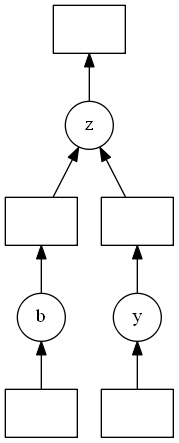

In [20]:
dask.visualize(dsk) # verbose=True

 * https://github.com/dask/dask/pull/5976
 * verbose=True
 * collapse=False
 
  <center>         
    <img src="./img/add_.png" alt="" style="width: 150px;"/>
    <b>Визуализация графа зависимостей задач</b>
</center>

__Высокоуровневый параллелизм в Dask__

<center>         
    <img src="./img/parllel.png" alt="Граф зависимостей задач" style="width: 600px;"/>
    <b>Граф зависимостей задач</b>
</center>

* Во многих библиотеках планирование задач производится неявно через оперирование более высокоуровневыми абстракциями.
* В Dask операции с высокоуровневыми коллекциями приводят к автоматическому (неявному) формированию графа зависимостей задач
* <b class="r">NB!</b> В Dask есть возможность в более явном виде формировать граф зависимости задач


* __Планировщик задач__ исполняет задачи из графа зависимостей задач с учетом зависимостей и по возможности задачи не зависимые по данным исполняет параллельно.
* Имеется __несколько реализаций планировщика__, подходящих для различных архитектур (простота замены планировщика обеспечивает легкость адаптации к различным уровням масштабирования и архитектурам)

__Scheduler Overview__

After we create a dask graph, we use a scheduler to run it. Dask currently implements a few different schedulers:

* `dask.threaded.get`: a scheduler backed by a thread pool
* `dask.multiprocessing.get`: a scheduler backed by a process pool
* `dask.get`: a synchronous scheduler, good for debugging
* `distributed.Client.get`: a distributed scheduler for executing graphs on multiple machines. This lives in the external distributed project.

In [21]:
dsk2 = {'a': 1,
       'b': 2,
       'c': (add, 'a', 'b'),
       'd': (sum, ['a', 'b', 'c'])}

In [22]:
dthr.get(dsk2, 'c')

3

In [23]:
dthr.get(dsk2, 'd')

6

In [24]:
dthr.get(dsk2, ['a', 'b', 'c'])

(1, 2, 3)

The dask collections each have a default scheduler:

* `dask.array` and `dask.dataframe` use the threaded scheduler by default
* `dask.bag` uses the multiprocessing scheduler by default.
For most cases, the default settings are good choices. However, sometimes you may want to use a different scheduler.


* Подробнее тут: https://docs.dask.org/en/latest/scheduler-overview.html

__Using compute methods__

* When working with dask collections, you will rarely need to interact with scheduler `get` functions directly. 
* Each collection has a default scheduler, and a built-in `compute()` method that calculates the output of the collection

_Пример 1_ : формирование графа зависимостей задач при использовании высокоуровневого параллелизма
* Операция с dask.array, построенной на базе numpy.ndarray
* Простой пример

In [25]:
import dask.array as da

In [26]:
x = da.ones((15, 15), chunks=(5, 5))
res = x.sum(axis=0)

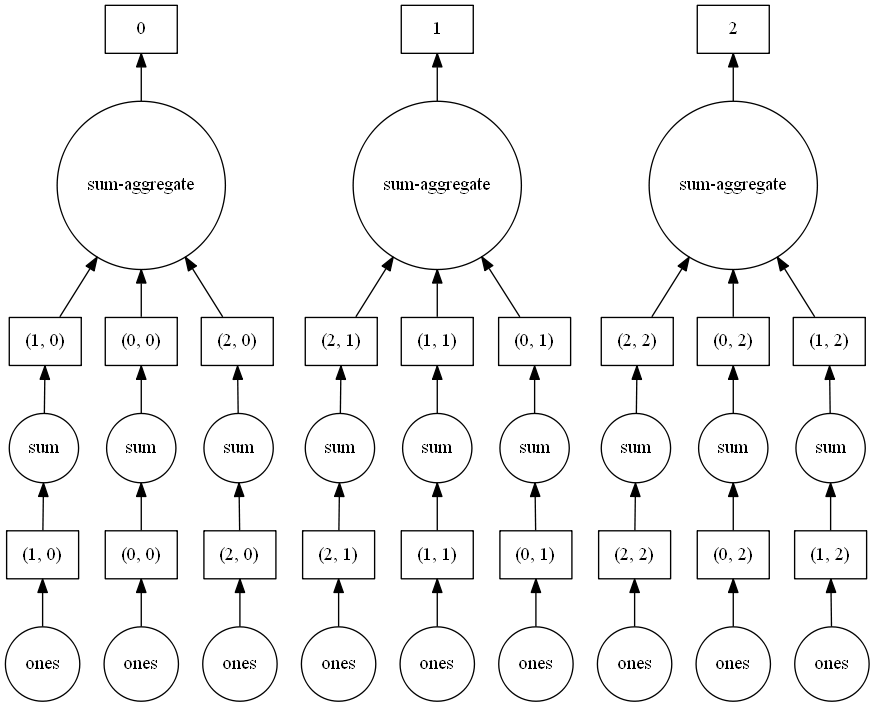

In [27]:
res.visualize()

In [28]:
res.compute()

array([15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15.])

_Пример 2_ : формирование графа зависимостей задач при использовании высокоуровневого параллелизма
* Операция с dask.array, построенной на базе numpy.ndarray
* Более сложный пример

In [29]:
x = da.ones((15, 15), chunks=(5, 5))

In [30]:
res2 = x.dot(x.T + 1)

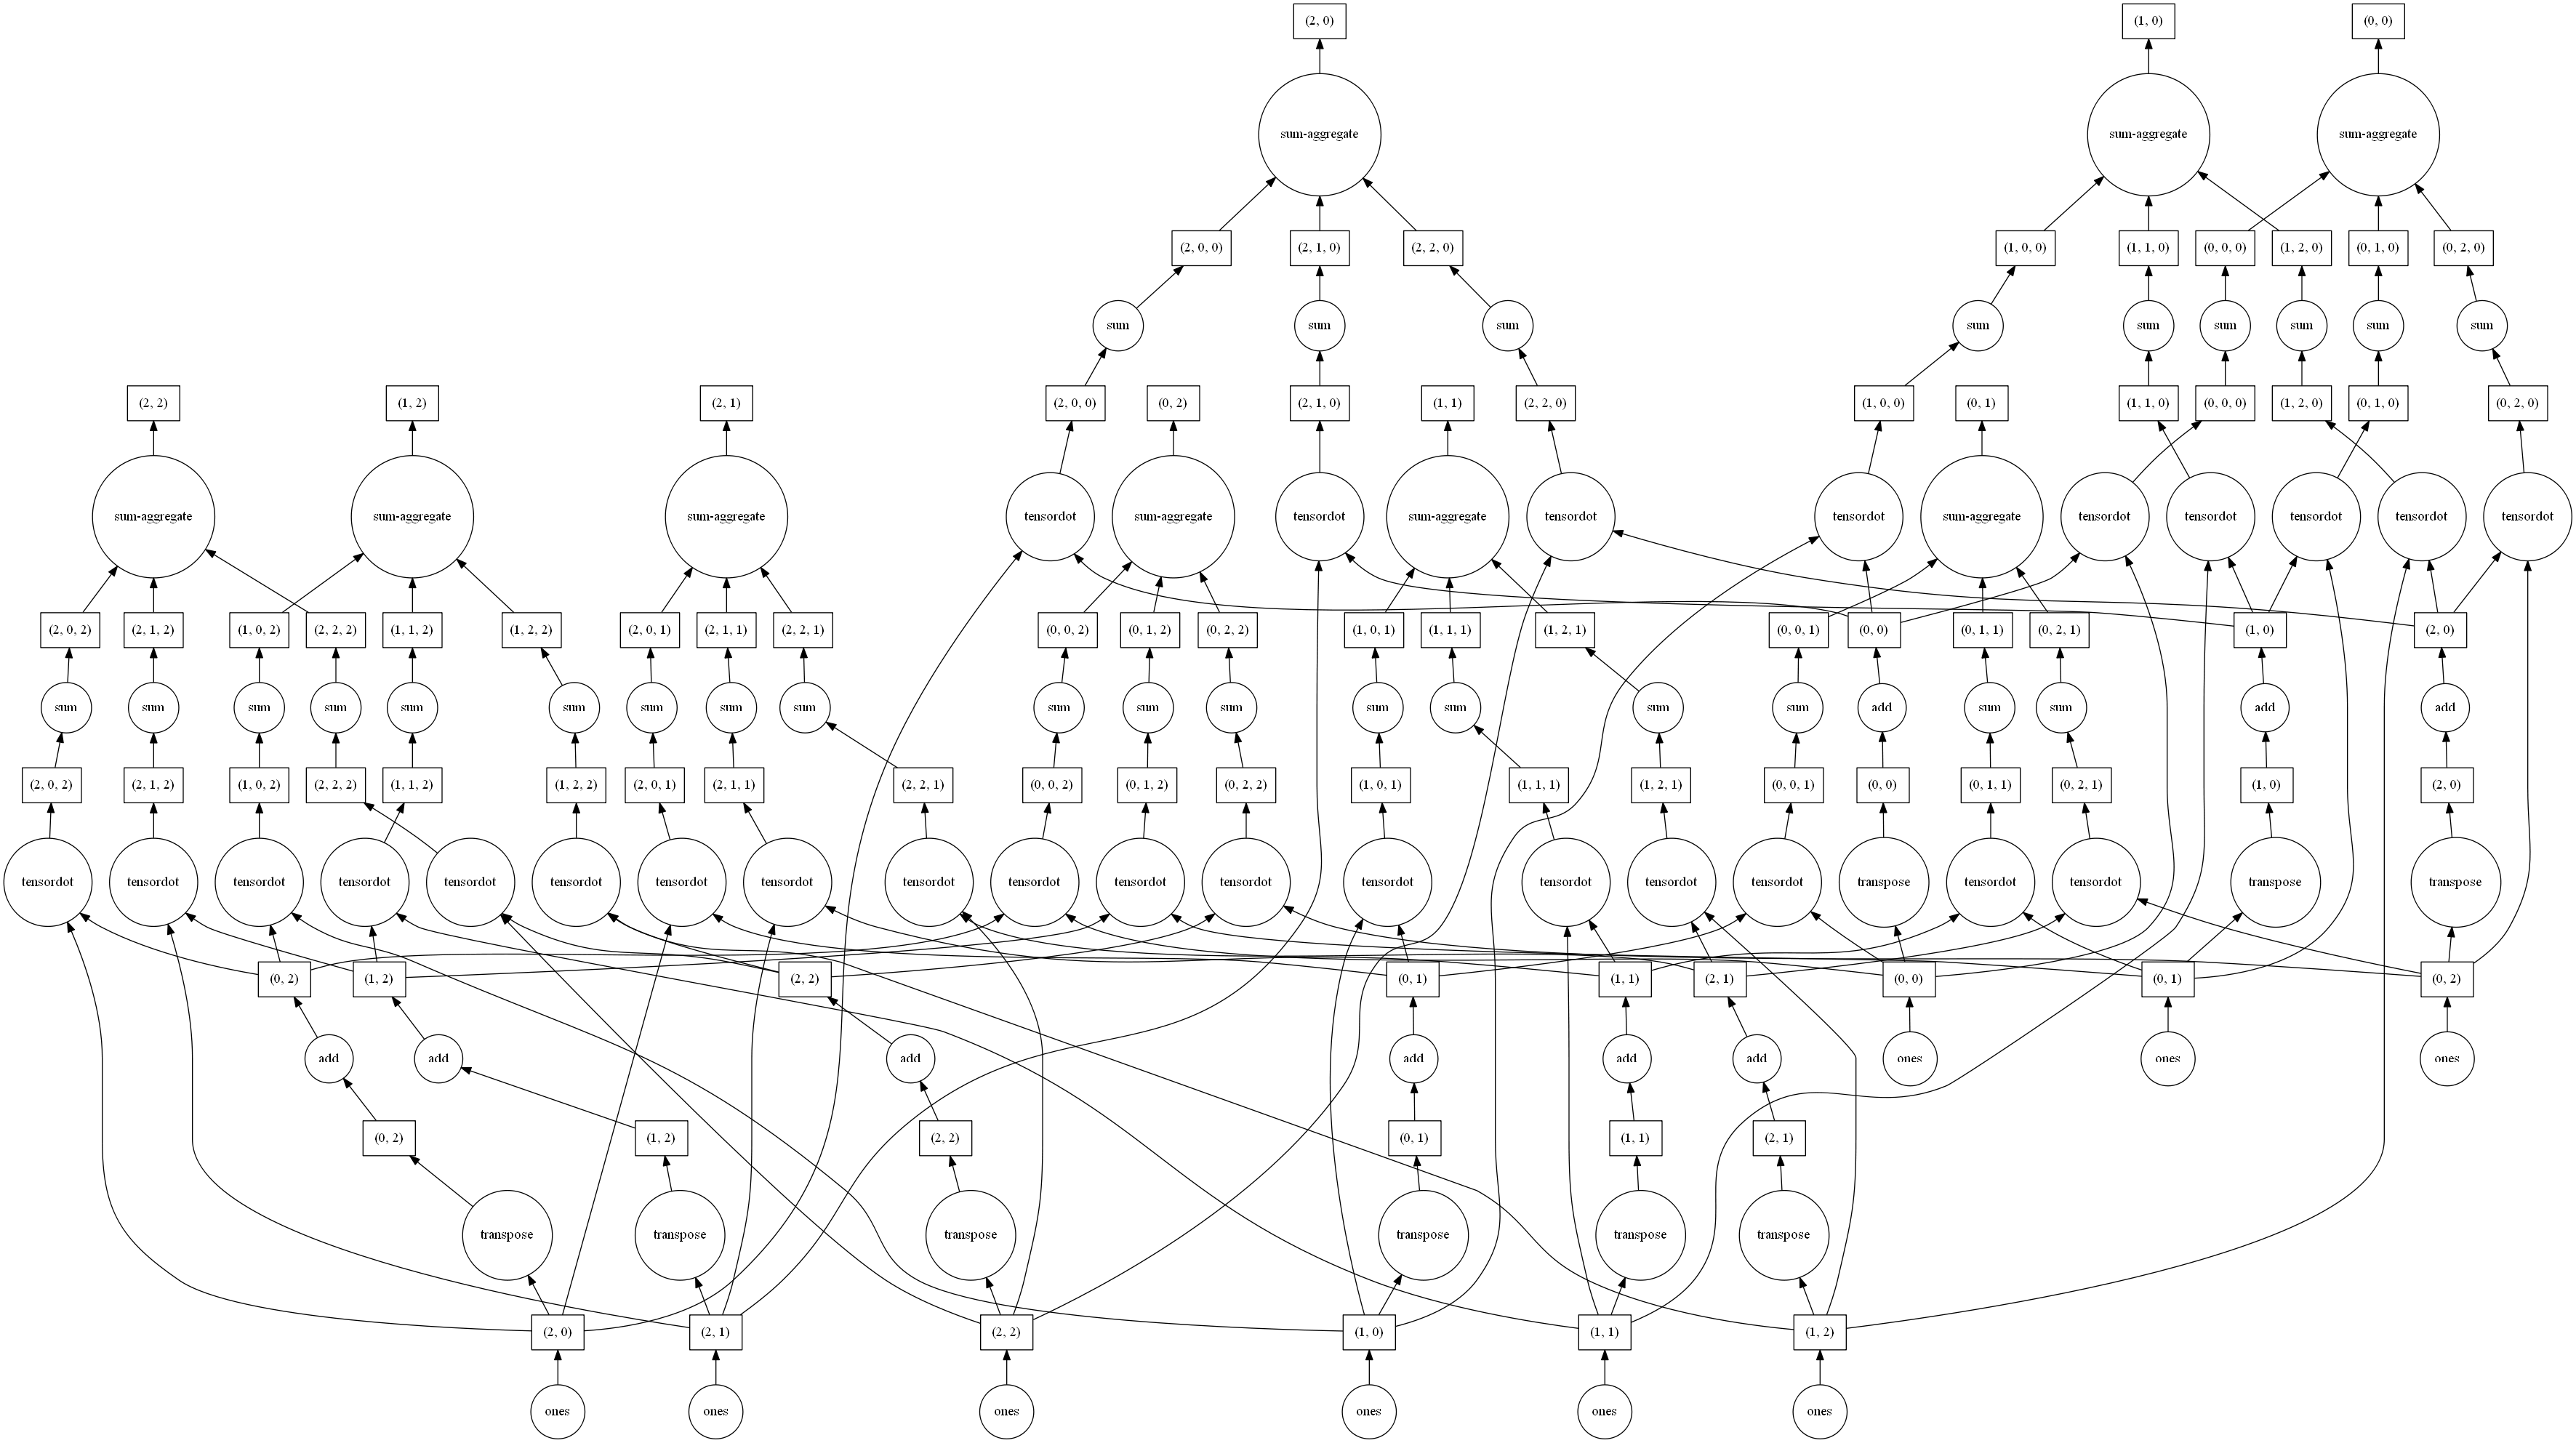

In [31]:
res2.visualize()

__!!! Анимированный вариант!__

<center>         
    <img src="./img/execution_gf.gif" alt="Граф зависимостей задач" style="width: 600px;"/>
    <b>Граф зависимостей задач</b>
</center>

__Типичная архитектура для параллельной обработки данных__

Большинство фреймворков для параллельной обработки данных имеют архитектуру из следующих уровней:

1. Высокоуровеновое API для пользователя. Примеры:
    * SQL
    * выражения линейной алгебры

2. План выполнения запросов среднего уровня. Пример: 
    * шаги подхода map/reduce 

3. Низкоуровневый граф зависимостей задач.Пример:
    * прочитать блок данных объемом 100 МБ
    * выполнить пользовательскую функцию `f()` для блока 
    * и т.д.

4. Система исполнения задач. Пример: 
    * выполнить задачу с id 4213 на исполнителе 15;
    * переместить блок данных с id 1285 к исполнителю 25;
    * и т.д.
    
   

<center>         
    <img src="./img/par_framworks.png" alt="Граф зависимостей задач" style="width: 600px;"/>
    <b>Граф зависимостей задач</b>
</center>

__Примеры реализации архитектуры для параллельной обработки данных__

Высокоуровневое представление операций является мощным инструментом:
* <em class="pl"></em> дает емкий и выразительный язык для описания операций;
* <em class="pl"></em> позволяет реализовывать специальные стратегии оптимизации;


но:
* <em class="mn"></em> ограничивает возможные операции предлагаемой высокоуровневой логикой.


<center>         
    <img src="./img/arch_sql.png" alt="Высокоуровневое представление операций" style="width: 400px;"/>
    <b>Высокоуровневое представление операций для параллельной обрабоки: пример SQL</b>
</center>

<center>         
    <img src="./img/arch_spark.png" alt="Высокоуровневое представление операций" style="width: 400px;"/>
    <b>Высокоуровневое представление операций для параллельной обрабоки: пример Spark</b>
</center>

<center>         
    <img src="./img/arch_matrix.png" alt="Высокоуровневое представление операций" style="width: 400px;"/>
    <b>Высокоуровневое представление операций для параллельной обрабоки: пример матричных вычислений</b>
</center>

__Архитектура для параллельной обработки данных Dask__

* В Dask не заложено единой высокоуровневой абстракции
* Dask не выполняет оптимизации графа зависимости задач (за счет использования высокоуровневой логики)
* Dask может использоваться для разных абстракций (но не имеет конкретной специализации)
* На основе инфраструктуры Dask можно построить библиотеку для параллельных вычислений для различных предметных областей

<center>         
    <img src="./img/arch_dask.png" alt="Высокоуровневое представление операций" style="width: 600px;"/>
    <b>Архитектура для параллельной обработки данных Dask</b>
</center>

__Dask VS Spark__

__Spark__
* Большой фрэймворк
* JVM, основан на Scala
* нацелен на использование на больших кластерах
* Нацелен на обработку действительно больших данных (~10ТБ+)
* заменяет существующие библиотеки
* тяжело использовать для реализации сложных алгоритмов

<center>         
    <img src="./img/spark_.png" alt="Схема вычислений на Spark" style="width: 300px;"/>
    <b>Схема вычислений на Spark</b>
</center>

__Dask__:
* «просто библиотека»
* реализована на чистом Python
* хорошо подходит для работы на одном компьютере
* хорошо подходит для данных средних размеров (~100МБ- 100ГБ)
* основан на популярных библиотеках Python
* разработан для создания параллельных реализаций сложных алгоритмов

<table border="0">
    <tbody>
        <tr>
            <td>
                <img src="./img/dask_scheme1.png" alt="Вычисления на Dask не имеют жесткой схемы" style="width: 250px;"/>
            </td>
            <td>
                <img src="./img/dask_scheme2.png" alt="Вычисления на Dask не имеют жесткой схемы" style="width: 250px;"/>
            </td>
        </tr>
    </tbody>
</table>    
<center>         
    <b>Вычисления на Dask не имеют жесткой схемы</b>
</center>

__Ограничения библиотеки Dask__

* Dask не имеет функционала реляционной базы данных
    * Подходит для выполнения запросов Pandas, но не может оптимизировать комплексные запросы
* Dask не является технологией основанной на JVM
    * Dask основан на технологиях Python
* Dask не является монолитным фрэймворком
    * Для работы Dask нужно устанавливать Pandas и другие библиотеки (дистрибутива Anaconda достаточно)
* В действительности параллелизм нужен далеко не всегда
    * Для многих задач небольшого объема достаточно возможностей последовательных вычислений

## Dask Array

__Dask Array__

* Dask Array реализует __подмножество интерфейса NumPy ndarray__, используя __алгоритмы в блочной форме__
    * Большой массив разбивается на относительно небольшие блоки которые обрабатываются независимо
* Эта техника позволяет:
    * оперировать массивами, большими чем оперативная память
    * использовать все доступные ядра.
* __Координация задач__, возникающих при исполнении блочной формы алгоритмов, осуществляется при помощи реализованного в Dask __графа зависимостей задач__.

<center>         
    <img src="./img/dask_array.png" alt="Принцип организации данных в Dask Array" style="width: 400px;"/>
    <b>Принцип организации данных в Dask Array</b>
</center>

Реализация Dask Array:
* Dask Array представляет собой __сетку из массивов NumPy__, обработку которых он организует __порождая__ для каждой операции со всем массивом __множество операций с массивами NumPy__. 
* Массивы NumPy могут:
    * находится в оперативной в памяти
    * находится в распределенной оперативной в памяти кластера (т.е. хранится на узлах кластера)
    * находится на диске (по крайней мере часть времени вычислений).

__Основные возможности Dask Array__

__Dask Array поддерживает большинство интерфейсов NumPy, в частности__:
* Арифметические операции и скалярные функции: `+`, `*`, `exp`, `log`, ...
* Агрегирующие функции (в т.ч. вдоль осей): `sum()`, `mean()`, `std()`, `sum(axis=0)`, ...
* Умножение матриц, свёртка тензоров: `tensordot`
* Получение срезов: `x[:100, 500:100:-2]`
* Прихотливое индексирование вдоль одной оси: `x[:, [10, 1, 5]]`
* Работу с протоколами массивов `__array__` и `__array_ufunc__`
* Некоторые операции линейной алгебры: `svd`, `qr`, `solve`, `solve_triangular`, `lstsq`

Подробнее см.: https://docs.dask.org/en/latest/array-api.html .

-

Но, Dask Array не поддерживает следующих возможностей NumPy:
* Не реализована большая часть пакета np.linalg
* Не поддерживаются операции с массивами неизвестного размера
* Операции наподобие sort , которые по своей сути сложно выполнять параллельно не поддерживаются. Зачастую, вместо таких операций предлагается альтернативная функция, дружественная к параллельному вычислению
* Не поддерживаются операции типа tolist, т.к. это очень неэффективно для больших наборов данных, тем более что, обход этих данных в циклах очень неэффективен.

In [32]:
import os
import numpy as np
import h5py
import dask.array as da

In [33]:
data_f  = h5py.File('rnd_data.hdf5', 'r')
list(data_f.keys())

['data_set_1']

In [34]:
data_set = data_f['/data_set_1']

In [5]:
# x_np.shape, x_np.mean(axis=0).shape

In [35]:
data_set.shape

(1000, 10000)

In [36]:
x_np = np.array(data_set)
x_np - x_np.mean(axis=0)

array([[ 0.80332199,  0.44760147, -0.81681302, ...,  1.03700581,
         0.43620106,  0.0338227 ],
       [-0.82655764, -1.30722175,  0.13024821, ...,  0.53597989,
         0.31680221, -0.56813897],
       [ 0.80976638, -1.02483341, -1.6189688 , ..., -0.17780924,
        -0.42473989, -0.79280668],
       ...,
       [ 0.33245498, -1.57501567, -0.35463567, ..., -0.24349239,
         0.46046747,  0.16026511],
       [-0.79332241, -0.25260379, -0.15460491, ..., -0.69995477,
        -0.62394469,  0.49440553],
       [-1.26302371,  0.61456215,  0.77488017, ..., -1.71411188,
         0.46673837, -0.72748817]])

In [37]:
x_da = da.from_array(data_set, chunks=(500, 500))
r = x_da - x_da.mean(axis=0)

In [8]:
r

dask.array<sub, shape=(1000, 10000), dtype=float64, chunksize=(500, 500), chunktype=numpy.ndarray>

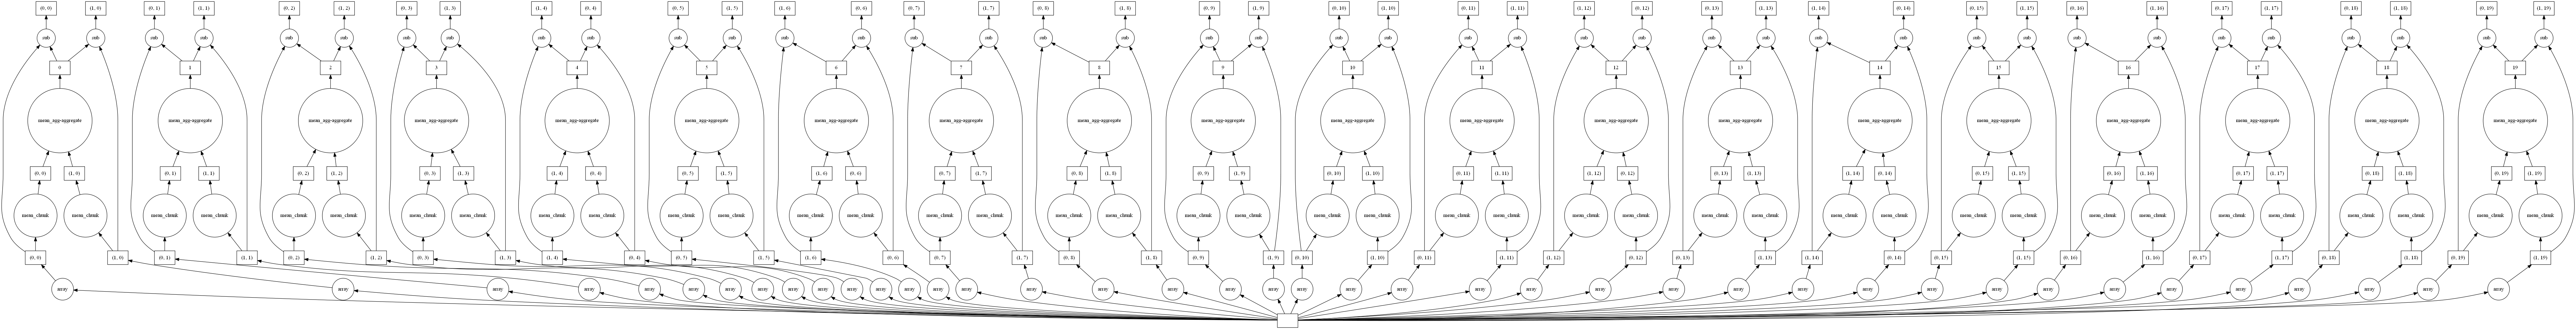

In [38]:
r.visualize()

In [39]:
x_da = da.from_array(data_set, chunks=(500, 500))
(x_da - x_da.mean(axis=0)).compute()

array([[ 0.80332199,  0.44760147, -0.81681302, ...,  1.03700581,
         0.43620106,  0.0338227 ],
       [-0.82655764, -1.30722175,  0.13024821, ...,  0.53597989,
         0.31680221, -0.56813897],
       [ 0.80976638, -1.02483341, -1.6189688 , ..., -0.17780924,
        -0.42473989, -0.79280668],
       ...,
       [ 0.33245498, -1.57501567, -0.35463567, ..., -0.24349239,
         0.46046747,  0.16026511],
       [-0.79332241, -0.25260379, -0.15460491, ..., -0.69995477,
        -0.62394469,  0.49440553],
       [-1.26302371,  0.61456215,  0.77488017, ..., -1.71411188,
         0.46673837, -0.72748817]])

In [12]:
x_da

,Array,Chunk
Bytes,80.00 MB,80.00 kB
Shape,"(1000, 10000)","(100, 100)"
Count,1001 Tasks,1000 Chunks
Type,float64,numpy.ndarray


Документация:
* Tutorial: 
    * https://examples.dask.org/array.html
    * https://github.com/dask/dask-tutorial
    * https://github.com/dask/dask-tutorial/blob/master/03_array.ipynb    
* https://docs.dask.org/en/latest/array.html